In [2]:
import sys, os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

data_DIR = "../data/shiny/"

In [ ]:
from plotnine.ggplot import ggplot
from plotnine import aes, scale_fill_gradient, theme, element_blank,element_text, geom_tile, geom_text, labs, theme_xkcd, element_rect, element_text

In [6]:
def get_cat(var):
    var_cat = ""
    if var == "Points":
        var_cat = "Pts_cat"
    elif var == "Assists":
        var_cat = "Ast_cat"
    elif var == "Rebounds":
        var_cat = "Reb_cat"
    elif var == "Steals":
        var_cat = "Stl_cat"
    elif var == "Blocks":
        var_cat = "Blk_cat"
    return var_cat

In [3]:
df1 = pd.read_parquet(data_DIR + "NBA_Player_Scorigami.parquet")

In [43]:
player = "Luka Doncic"
dff = df1.query(f'Player == "{player}"')

In [47]:
var1 = "Points"
var2 = "Rebounds"

In [48]:
cat1 = get_cat(var1)
cat2 = get_cat(var2)
dfc = dff.groupby([cat1,cat2], observed=True)[["Player"]].count()
dfc.columns = ["Counts"]
dfc = dfc.reset_index()

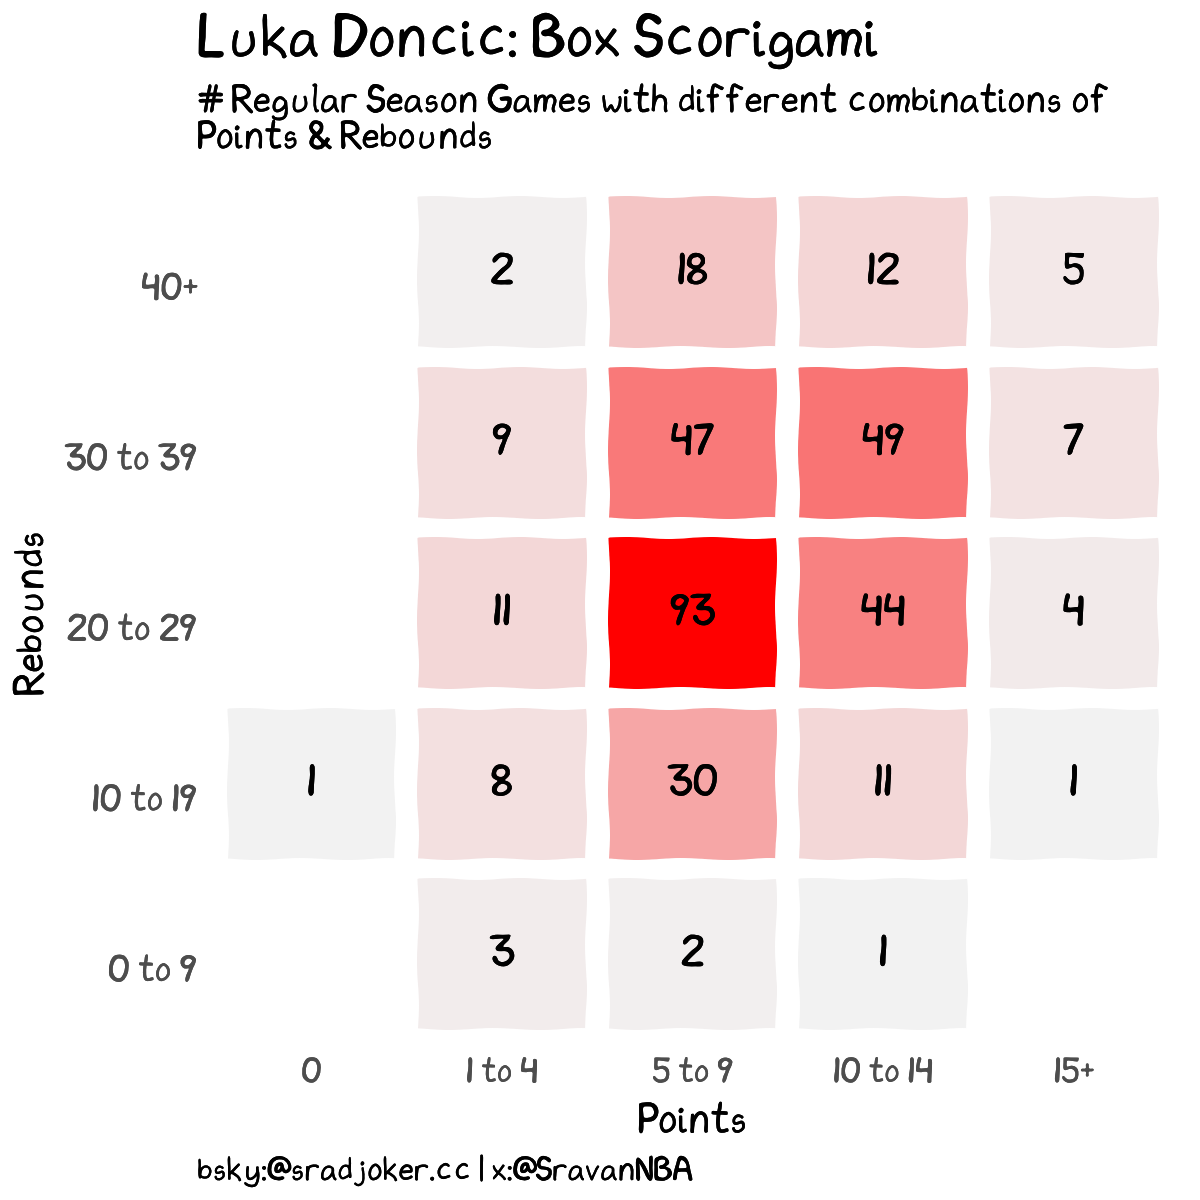

In [49]:
p = (
    ggplot(dfc,aes(x=cat2, y=cat1, fill="Counts"))
    + geom_tile(aes(width=.88, height=.88))
    + geom_text(aes(label='Counts'), size=14, show_legend=False, fontweight = "bold") 
    + scale_fill_gradient(low = "#f2f2f2", high = "red")
    + labs(
        title = player + ": Box Scorigami",
        subtitle = f"# Regular Season Games with different combinations of\n{var1} & {var2}",
        caption = "bsky:@sradjoker.cc | x:@SravanNBA",
        x = var1,
        y = var2,
    )
    + theme_xkcd(base_size=14, stroke_color="none")
    + theme(
        plot_background = element_rect(fill = 'white', color = "white"),
        legend_position="none",
        plot_title=element_text(face="bold", size=20),
        plot_subtitle=element_text(size=13),
        plot_caption=element_text(hjust=0),
        figure_size= (6,6),
        axis_text_y = element_text(size = 12, vjust=1),
    )
    + theme(
        axis_ticks_major_y=element_blank(),
        axis_ticks_major_x=element_blank(),
        axis_ticks_minor_y=element_blank(),
        axis_ticks_minor_x=element_blank(),
        panel_grid_major_y=element_blank(),
        panel_grid_major_x=element_blank(),
        panel_border=element_blank(),
    )
)
# p.save(f"Scorigami " + player + ".png", dpi=300, verbose=False)
p